# **Laboratorio N°5: Número de Condición**


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.array([[0.8566, 0.6183], [0.8415, 0.6074]])
b = np.array([[1.4750], [1.4488]])
x = np.linalg.solve(A,b)
print(x)

[[-199.93442627]
 [ 279.37704924]]


## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

In [4]:
A = np.array([[1,0],[0,1]])
print(2*np.linalg.cond(A) == np.linalg.cond(2*A))

False


**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

In [5]:
B = np.array([[2,0],[0,2]])
print(np.linalg.cond(A)-np.linalg.cond(B) == np.linalg.cond(A-B))

False


**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

In [6]:
A = np.array([[2,1],[0,2]])
C = np.array([[2,0],[1,2]])
print(np.linalg.cond(A)*np.linalg.cond(C) == np.linalg.cond(A@C))

False


In [7]:
V = np.random.rand(2, 100) - 0.5
V / np.linalg.norm(V)

array([[ 0.10776632,  0.07230912, -0.09797965,  0.12265689, -0.01598233,
         0.10612694, -0.08183784,  0.05413819, -0.04383381, -0.09585255,
         0.11247699, -0.08745743, -0.11919791,  0.01875848, -0.11705311,
        -0.11726013, -0.12136403,  0.01065463, -0.10222392, -0.07448741,
        -0.0922388 ,  0.09922596, -0.1202279 , -0.01410912,  0.01150609,
        -0.08601738,  0.1066888 ,  0.01151285,  0.07164114,  0.0463144 ,
         0.0298636 ,  0.02553661,  0.07290757, -0.02468157,  0.02881108,
         0.0027078 ,  0.06664534, -0.1089106 , -0.12008019,  0.03913987,
         0.07243047,  0.11786264,  0.04866915,  0.12263767, -0.0846672 ,
         0.10457609, -0.00325918,  0.05673637,  0.02837563, -0.02794351,
        -0.02811128,  0.06876457,  0.08549395, -0.0366767 ,  0.0183983 ,
        -0.03914359, -0.07836846, -0.01395955, -0.06379443, -0.05556596,
        -0.09301231,  0.02397668,  0.02552001,  0.01950913, -0.11404461,
        -0.06056885, -0.07036383,  0.08794831,  0.0

## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [8]:
def matriz_A(n):
    A = (1/n)*np.eye(n, k=0)
    A[0][n-1] = n**2
    A[n-1][0] = 1
    return A
    
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

def matriz_H(n):
    H = 0*np.eye(n, k=0)
    for i in range(n):
        for j in range(n):
            H[i][j] = 1/(j+i+1)
    return H

print(matriz_H(3))

[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


In [9]:
A = matriz_A(4)
print(A)

[[ 0.25  0.    0.   16.  ]
 [ 0.    0.25  0.    0.  ]
 [ 0.    0.    0.25  0.  ]
 [ 1.    0.    0.    0.25]]


**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

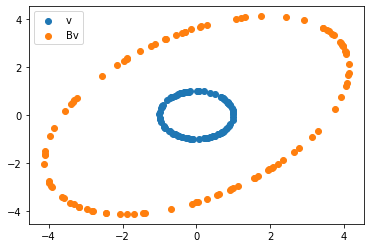

In [10]:
B = matriz_B(2)
V = np.random.rand(2, 100) - 0.5

for i in range(100):
    n = np.sqrt(V[0][i]**2+V[1][i]**2)
    V[0][i] /= n
    V[1][i] /= n
    
BV = B@V

plt.scatter(V[0], V[1], label = "v")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.legend()

**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [11]:
def vector_condicion(M, N):
    v = []
    for i in range(0,N):
        v.append(np.linalg.cond(M[i]))
    return v

In [12]:
A = [matriz_A(i) for i in range(1,11)]
B = [matriz_B(i) for i in range(1,11)]
H = [matriz_H(i) for i in range(1,11)]

**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


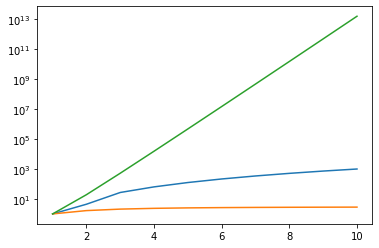

In [15]:
x = np.array([n for n in range(1,11)])
yA = vector_condicion(A, 10)
yB = vector_condicion(B, 10)
yH = vector_condicion(H, 10)

plt.plot(x, yA)
plt.plot(x, yB)
plt.plot(x, yH)
plt.yscale("log")
plt.show()

**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (d) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

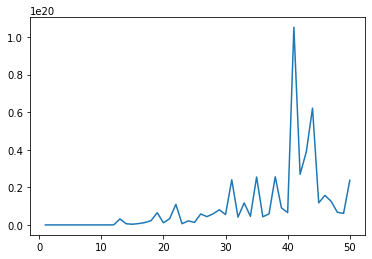

In [16]:
H = [matriz_H(i) for i in range(1,51)]
x = np.array([n for n in range(1,51)])
yH = vector_condicion(H, 50)
plt.plot(x, yH)

## Ejercicio 3 (Ej 20 - Práctica 2)

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [ ]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 5/4]])

(a) Calcular $Cond_\infty(A)$.


In [20]:
def norma_inf(A):
    res = 0
    for j in range(len(A)):
        B = [A[i][j] for i in range(len(A))]
        print(B)
        #res += max(B)
    return res

norma_inf(A)

[array([1.]), array([0.5, 4. ]), array([0.33333333, 0.        , 9.        ]), array([ 0.25,  0.  ,  0.  , 16.  ]), array([ 0.2,  0. ,  0. ,  0. , 25. ]), array([ 0.16666667,  0.        ,  0.        ,  0.        ,  0.        ,
       36.        ]), array([ 0.14285714,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 49.        ]), array([ 0.125,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 64.   ]), array([ 0.11111111,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 81.        ]), array([  0.1,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
       100. ])]


IndexError: index 1 is out of bounds for axis 0 with size 1

(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



In [ ]:
#COMPLETAR

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.